In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
train_data.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

In [4]:
train_data.groupby(['race', 'sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female   8721.885714  38.614286  126253.828571   
                   Male     8961.526316  38.063158  123449.463158   
Asian-Pac-Islander Female  10315.365482  35.401015  151437.309645   
                   Male     9571.000000  38.426735  171694.431877   
Black              Female   9202.054273  37.613164  214048.775982   
                   Male     8896.718900  37.498804  239637.965311   
Other              Female   9680.277778  31.305556  174661.458333   
                   Male     8401.516484  34.527473  203378.439560   
White              Female   8977.973319  36.741942  182440.401708   
                   Male     8509.615679  39.998821  189440.403281   

                           education.num  capital.gain  capital.loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.657143    579.957143      0.000000   
                   Male         9.010526   1029.294737     36.442105   
Asian-Pac-Islander Female      10.375635   1180.035533     58.695431   
                   Male        11.167095   2000.043702    100.830334   
Black              Female       9.493072    598.374134     39.057737   
                   Male         9.349282    569.379187     93.771531   
Other              Female       8.902778    385.541667     54.930556   
                   Male         8.835165   1245.109890    103.703297   
White              Female      10.078975    547.578655     61.509925   
                   Male        10.100894   1372.454956     98.054524   

                           hours.per.week    target  
race               sex                               
Amer-Indian-Eskimo Female       36.400000  0.114286  
                   Male         44.115789  0.168421  
Asian-Pac-Islander Female       37.213198  0.096447  
                   Male         40.637532  0.300771  
Black              Female       37.000000  0.056582  
                   Male         40.028708  0.172249  
Other              Female       35.194444  0.069444  
                   Male         42.681319  0.109890  
White              Female       35.678762  0.117609  
                   Male         42.271932  0.313096

In [5]:
train_data['race_sex'] = train_data['race'].map(str)+'_'+train_data['sex']

In [6]:
train_data.drop(['race', 'sex'], axis=1, inplace=True)

In [7]:
train_data.dropna(axis=0,subset=['workclass','occupation','native.country'],inplace = True)

In [8]:
test_data['race_sex'] = test_data['race'].map(str)+'_'+test_data['sex']

In [9]:
test_data.drop(['race', 'sex'], axis=1, inplace=True)

In [10]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train_data)

결측치가 존재하지 않습니다


In [11]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train_input = label_encoder(train_data, make_label_map(train_data))
test_input = label_encoder(test_data, make_label_map(test_data)) 

<AxesSubplot:>

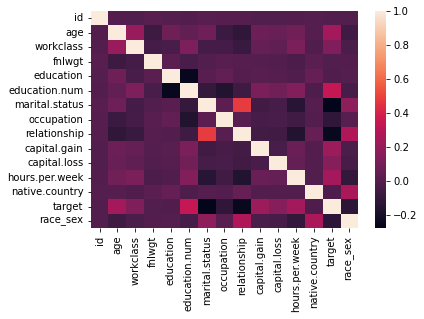

In [12]:
sns.heatmap(train_data.corr())

In [13]:
from pycaret.classification import *
import scipy, sklearn, lightgbm, pycaret
import numpy as np

In [14]:
exp = setup(data=train_input, 
            target='target',
            fold_shuffle=True,
            imputation_type='iterative',
            session_id = 42
           )

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(15081, 15)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [15]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8626,0.9213,0.6387,0.7786,0.7014,0.6134,0.6187,2.7410
lightgbm,Light Gradient Boosting Machine,0.8620,0.9206,0.6522,0.7677,0.7046,0.6154,0.6193,0.2920
xgboost,Extreme Gradient Boosting,0.8566,0.9155,0.6432,0.7543,0.6938,0.6010,0.6046,1.2800
gbc,Gradient Boosting Classifier,0.8563,0.9139,0.5784,0.7978,0.6702,0.5814,0.5939,1.0060
ada,Ada Boost Classifier,0.8533,0.9081,0.6200,0.7566,0.6813,0.5872,0.5923,0.3030
rf,Random Forest Classifier,0.8468,0.8977,0.6144,0.7365,0.6696,0.5710,0.5752,0.7590
lda,Linear Discriminant Analysis,0.8313,0.8898,0.5560,0.7148,0.6250,0.5184,0.5255,0.1110
ridge,Ridge Classifier,0.8306,0.0000,0.5144,0.7369,0.6054,0.5020,0.5154,0.0330
et,Extra Trees Classifier,0.8210,0.8706,0.5953,0.6638,0.6269,0.5097,0.5115,0.8250
dt,Decision Tree Classifier,0.7996,0.7376,0.6121,0.6022,0.6067,0.4724,0.4727,0.0720


In [16]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8598,0.9168,0.6554,0.7576,0.7028,0.6117,0.6145
1,0.8665,0.9175,0.6554,0.7812,0.7128,0.6267,0.6308
2,0.8438,0.9125,0.5993,0.7339,0.6598,0.5597,0.5646
3,0.8513,0.9243,0.5768,0.7778,0.6624,0.5697,0.5802
4,0.8693,0.9226,0.6479,0.7972,0.7149,0.6313,0.6370
5,0.8759,0.9270,0.6791,0.8018,0.7354,0.6551,0.6589
6,0.8711,0.9298,0.6854,0.7787,0.7291,0.6450,0.6472
7,0.8692,0.9223,0.6442,0.8000,0.7137,0.6302,0.6364
8,0.8701,0.9291,0.6517,0.7982,0.7175,0.6343,0.6398
9,0.8493,0.9111,0.5918,0.7596,0.6653,0.5699,0.5773


In [17]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8627,0.9169,0.6554,0.7675,0.7071,0.6181,0.6214
1,0.8561,0.9103,0.6142,0.7700,0.6833,0.5917,0.5980
2,0.8475,0.9067,0.5918,0.7524,0.6625,0.5658,0.5726
3,0.8513,0.9184,0.5581,0.7926,0.6549,0.5638,0.5779
4,0.8608,0.9186,0.6105,0.7913,0.6892,0.6014,0.6098
5,0.8750,0.9219,0.6679,0.8063,0.7306,0.6502,0.6550
6,0.8711,0.9276,0.6704,0.7885,0.7247,0.6413,0.6449
7,0.8540,0.9127,0.5993,0.7729,0.6751,0.5829,0.5908
8,0.8635,0.9243,0.6142,0.8000,0.6949,0.6089,0.6178
9,0.8464,0.9117,0.5618,0.7692,0.6494,0.5541,0.5653


In [18]:
final_cb = finalize_model(tuned_cb)

In [19]:
pred = predict_model(final_cb, data=test_data)

In [20]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred['Label']
submission.to_csv('cat_boost_sub.csv', index=False)